# Lasso and Compressed Sensing of ECG data from MITDB physionet.org

## PART I: MITDB data reader - WFDB library

### MIT-BIH Arrhythmia Database

**Source:** [physionet.org](https://www.physionet.org/content/mitdb/1.0.0/)

**Authors:** George Moody, Roger Mark

**Version:** 1.0.0 (Feb. 24, 2005)

#### Citation Information

**Original publication:**

Moody GB, Mark RG. *The impact of the MIT-BIH Arrhythmia Database*. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209)

**Citation for PhysioNet:**

Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). *PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals*. Circulation [Online]. 101 (23), pp. e215–e220.

##### Additional References

- Mark RG, Schluter PS, Moody GB, Devlin PH, Chernoff D. *An annotated ECG database for evaluating arrhythmia detectors*. IEEE Transactions on Biomedical Engineering 29(8):600 (1982).
- Moody GB, Mark RG. *The MIT-BIH Arrhythmia Database on CD-ROM and software for use with it*. Computers in Cardiology 17:185-188 (1990).

#### Background

Since 1975, laboratories at Boston’s Beth Israel Hospital (now the Beth Israel Deaconess Medical Center) and at MIT have supported research into arrhythmia analysis and related subjects. One of the first major products of that effort was the MIT-BIH Arrhythmia Database, completed and distributed in 1980. The database was the first generally available set of standard test material for evaluating arrhythmia detectors and has been used for that purpose as well as for basic research into cardiac dynamics at more than 500 sites worldwide. Originally, the database was distributed on 9-track half-inch digital tape at 800 and 1600 bpi, and on quarter-inch IRIG-format FM analog tape. In August 1989, a CD-ROM version of the database was produced.

#### Data Description

The MIT-BIH Arrhythmia Database contains:

- 48 half-hour excerpts of two-channel ambulatory ECG recordings.
- Data obtained from 47 subjects (1975-1979).
- 23 recordings chosen at random from a set of 4000 24-hour ambulatory ECG recordings from Boston’s Beth Israel Hospital (inpatients 60%, outpatients 40%).
- 25 recordings selected to include less common but clinically significant arrhythmias.
- Digitized at 360 samples per second per channel with 11-bit resolution over a 10 mV range.
- Annotations by two or more cardiologists; disagreements resolved to obtain reference annotations (approx. 110,000 annotations).


In [1]:
# Downloading the database (command worked on August 2024, otherwise look for the database on physionet.org)

# This will ignore:
# mitdbdir: html where data is presented and explained (go on website if intrested or download without "--exclude" option)
# *.xws: files that are used to visualize data on a Physionet.org tool called "LightWave" (go on website if intrested or download without "--reject" option)

#!wget -r -N -c -np --reject "*.xws" --exclude-directories=mitdbdir https://physionet.org/files/mitdb/1.0.0/



### Step 1: Retrieving the Data Path

To read the MITDB (MIT-BIH Arrhythmia Database) data using the `wfdb` library, we first need to retrieve the data path. In this Jupyter Notebook, the data path is stored in the `data_folder` variable.
We can use this path to locate the specific record we want to read. In this case, the record number is stored in the `record_number` variable.

To construct the full path to the record, we can use the `os.path.join()` function as follows:



In [2]:
import os

# Define the project root directory (assuming the notebook is in the root directory)
project_root = os.getcwd()  # Gets the current working directory, which is the root in this case

# Define the relative path to the data folder
data_folder = os.path.join(project_root, 'physionet.org', 'files', 'mitdb', '1.0.0')

# Specify the record number
record_number = '100'  # Change this to the desired record number

# Construct the full path to the record
record_path = os.path.join(data_folder, record_number)


# print record_path
print(record_path)


/home/franco/Dropbox/AA_Fra_Rosnati/B_Education/AA_University/AA_PoliMi/AA_Ing/01_Magistrale/HPC_engineering/1_sem_HPC/NAML/NAML_project/NAML_ECG_compressor/physionet.org/files/mitdb/1.0.0/100



### Step 2: Load the signal and annotations
In the code above, we first import the `wfdb` module. Then, we use the `rdrecord()` function to load the signal from the specified `record_path`. We also use the `rdann()` function to load the annotations for the same record. 

After executing this code, the signal will be stored in the `record` variable, and the annotations will be stored in the `annotation` variable.

We will then visualize the whole signal, it's unreadable on a 30 hours time frame, it's only we will check if loading went correctly

In [3]:
import wfdb

# Load the signal and annotations
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_name=record_path, extension='atr', shift_samps=True)


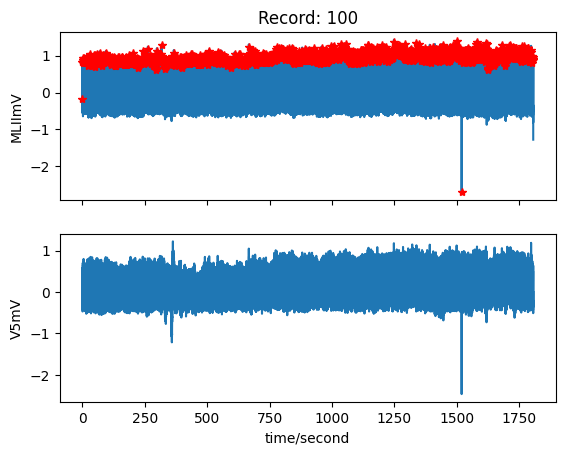

In [4]:
# Plot the signal with annotations, just to check if download went correctly
wfdb.plot_wfdb(record=record, annotation=annotation)

### Step 3: moving data to Pandas dataframe
Simply use the proper function from `wfdb` library

**Annotation will not be ported to pandas dataframe**

In [5]:
import pandas as pd
df = record.to_dataframe()

print(df.head(15))
print("\n")
print(df.dtypes)

                            MLII     V5
0 days 00:00:00           -0.145 -0.065
0 days 00:00:00.002777777 -0.145 -0.065
0 days 00:00:00.005555554 -0.145 -0.065
0 days 00:00:00.008333331 -0.145 -0.065
0 days 00:00:00.011111108 -0.145 -0.065
0 days 00:00:00.013888885 -0.145 -0.065
0 days 00:00:00.016666662 -0.145 -0.065
0 days 00:00:00.019444439 -0.145 -0.065
0 days 00:00:00.022222216 -0.120 -0.080
0 days 00:00:00.024999993 -0.135 -0.080
0 days 00:00:00.027777770 -0.145 -0.085
0 days 00:00:00.030555547 -0.150 -0.085
0 days 00:00:00.033333324 -0.160 -0.075
0 days 00:00:00.036111101 -0.155 -0.070
0 days 00:00:00.038888878 -0.160 -0.070


MLII    float64
V5      float64
dtype: object


## PART II: visualize the ECG data

The ECG wave consists of three main components: the P wave, the QRS complex, and the T wave.

- The P wave represents atrial depolarization, which is the contraction of the atria. It is typically a small and smooth upward deflection.
- The QRS complex represents ventricular depolarization, which is the contraction of the ventricles. It consists of three distinct waves: Q, R, and S. The Q wave is the first downward deflection, the R wave is the first upward deflection after the Q wave, and the S wave is the downward deflection after the R wave.
- The T wave represents ventricular repolarization, which is the recovery of the ventricles. It is typically a smooth upward deflection.

The typical duration of the P wave is around 80-100 milliseconds, the QRS complex lasts around 80-120 milliseconds, and the T wave lasts around 160-240 milliseconds.

The distance between waves can vary depending on the heart rate. In a normal sinus rhythm, the distance between consecutive P waves (P-P interval) is usually consistent and represents the atrial rate. The distance between consecutive R waves (R-R interval) represents the ventricular rate. The normal range for the R-R interval is around 600-1000 milliseconds.

When plotting hours-long ECG data, the waves become densely packed, making it difficult to interpret the waveform patterns. To overcome this, we can plot a specific interval of the ECG data by selecting a starting time and duration. This allows us to focus on a specific part of the ECG waveform and make it more interpretable.

In [6]:
# %matplotlib widget
import matplotlib.pyplot as plt


def plot_ecg_interval(df, start=0, duration=1, fs=360):
    """
    Plot an interval of ECG data.

    Parameters:
    - df: DataFrame containing the ECG data with time as index.
    - start: Starting time in seconds for the plot.
    - duration: Duration in seconds of the interval to plot.
    - fs: Sampling frequency (samples per second).
    """
    start_sample = int(start * fs)
    end_sample = int((start + duration) * fs)
    
    interval_df = df.iloc[start_sample:end_sample]
    
    fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plot MLII in the first subplot
    axes[0].plot(interval_df.index, interval_df['MLII'], label='MLII')
    axes[0].set_ylabel('Amplitude (mV)')
    axes[0].set_title(f'ECG MLII Data from {start} to {start + duration} seconds')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot V5 in the second subplot
    axes[1].plot(interval_df.index, interval_df['V5'], label='V5', color='orange')
    axes[1].set_xlabel('Time (seconds)')
    axes[1].set_ylabel('Amplitude (mV)')
    axes[1].set_title(f'ECG V5 Data from {start} to {start + duration} seconds')
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


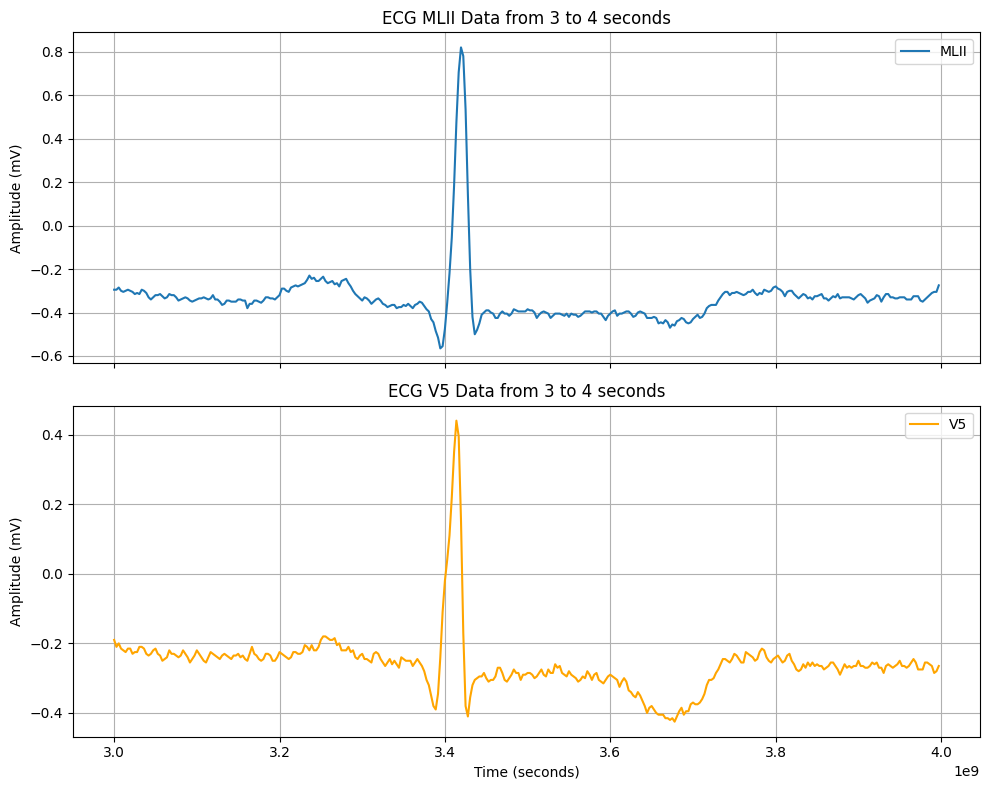

In [7]:
# Plot "duration" number of seconds of ecg data starting at "start" seconds
plot_ecg_interval(df, start=3, duration=1) # Change the start and duration values as needed

## PART III (Theoretical): sparsity and compression

Before building the compressed sensing (CS) based compressor for ECG data, we will first develop a "classic" transformation + sparsification compressor. This compressor will serve as a benchmark to evaluate the performance of the CS-based compressor.

To begin, let's review the theoretical background of transformations and explain why the Discrete Wavelet Transform (DWT) is the appropriate choice for ECG data.

Transformations are mathematical operations that convert data from one domain to another. In the context of compression, transformations are used to convert the data into a domain where it can be more efficiently represented and compressed.

### Understanding Sparsity

**Sparsity** refers to the condition where most elements in a dataset or signal are either zero or near zero, with only a small number of significant elements. Sparsity can be understood in two primary ways:

1. **Theoretical Sparsity**:
    A signal $s \in \mathbb{R}^n$ is considered **$k$-sparse** if it has exactly $k$ non-zero elements, with $k \ll n$. This means that $n-k$ elements of the signal are exactly zero. This is often used in theoretical contexts where sparsity is defined precisely. Mathematically, this can be represented as:

    $$
    s = \begin{pmatrix} s_1 \\ s_2 \\ \vdots \\ s_n \end{pmatrix}
    $$

    where exactly $k$ elements in $s$ are non-zero, and the remaining $n-k$ elements are zero.

2. **Practical Sparsity (compressible signal)**:
    In real-world signals, exact sparsity is rare. Instead, signals are often **approximately sparse or compressible**, where $n-k$ coefficients are small but not exactly zero. In this case, while only $k$ elements are significantly large and carry most of the signal's information, the remaining $n-k$ elements have small, non-negligible values. This reflects the practical scenarios where signals contain some noise or other minor components.

### Sparse Representation of Signals

"Most natural signals, such as images and audio, are highly compressible. This compressibility means that, when the signal is written in an appropriate basis, only a few modes are active, thus reducing the number of values that must be stored for an accurate representation. In other words, a compressible signal $s \in \mathbb{R}^n$ may be written as a sparse vector $x \in \mathbb{R}^n$ (containing mostly zeros) in a transform basis $\Psi \in \mathbb{C}^{n \times n}$:

$$
s = \Psi x.
$$

If the basis $\Psi$ is generic, such as the Fourier or wavelet basis, then only the few active terms in $s$ are required to reconstruct the original signal $x$, reducing the data required to store or transmit the signal."*

*(Directly quoting: Data-Driven Science and Engineering: Machine Learning, Dynamical Systems, and Control by Steven L. Brunton and J. Nathan Kutz, Chapter 3.1: Sparsity and Compressed Sensing.
)

NOTE: in general both signal and dictionary can be complex, we assume real valued signal, not to break generality we left the dictionary as complex valued. To be more clear: e.g. DFT is complex valued, while DCT is only real valued. Most of the times natural signals are real-valued, so it makes more sense to use DCT. (DFT is used usually for spectral analysis or other applications where complex coefficients are useful) 


### Classic Transformation-Based Compression

A typical transformation-based compression algorithm involves the following steps:
1. __Transformation to a sparse domain__:
    The signal $s$ is transformed to a sparse domain, basically we want to find the sparse vector $x \in \mathbb{R}^n$, that contain mostly negligible coefficients.

    Given $\Psi \in \mathbb{C}^{n \times n}$ dictionary or basis matrix. Being $\Psi$ an orthonormal basis, it possesses the following key properties:
    - **Orthonormality**: $\Psi$ satisfies $\Psi^H \Psi = I$, where $\Psi^H$ is the Hermitian conjugate (conjugate transpose) of $\Psi$, and $I$ is the identity matrix.
    - **Unitary Nature**: Being orthonormal implies that $\Psi^{-1} = \Psi^H$, making the transformation and its inverse straightforward.

    Therefore, when $ \Psi $ is an orthonormal basis, applying $ \Psi^H $ to the signal effectively inverts the transformation applied by $ \Psi $, we can use this to obtain sparse representation from original signal:

    $$
    x = \Psi^H s
    $$

2. __Sparsification__:
    A threshold is applied to the coefficients, retaining only those that are significant (i.e., above the threshold), and discarding the rest.

3. __Encoding__:
    The retained coefficients and their positions are then encoded for storage or transmission.

This method is effective but requires a thresholding step, which introduces non-linearity and computational complexity. We'll see that CS-based methods can provide an alternative solution with different advantages...

<center>
    <img src="./.img/MethodsComparison.png" alt="MethodsComparison.png" width="600">
</center>

### Compressed Sensing (CS) Based Compression

**Compressed Sensing (CS)** is an advanced technique that allows for the acquisition and reconstruction of sparse signals by solving an underdetermined linear system. CS eliminates the need for a separate sparsification step and operates as follows:
1. **Measurement**:

    Instead of acquiring all $n$ samples, a reduced set of $m$ measurements is obtained directly by projecting the signal onto a measurement matrix $\Phi$:

    $$
    y = \Phi x = \Phi \Psi s
    $$


    where:
    - **$k$-sparse** signal $s \in \mathbb{R}^n$
    - $y \in \mathbb{R}^m$
    - $\Psi \in \mathbb{R}^{n \times n}$ is the _dictionary_ (exactly as before)
    - $\Phi \in \mathbb{R}^{m \times n}$ with $m \ll n$ is the _measurement matrix_.

    The _measurement matrix_ $\Phi$ does not simply "select" $m$ out of $n$ coefficients. Instead, $\Phi$ typically contains random or structured elements that ensure the measurements $y$ retain sufficient information to recover the sparse signal $s$. 

    __Incoherence__: A critical concept in compressed sensing is the _incoherence_ between the measurement matrix $\Phi$ and the dictionary $\Psi$. Incoherence refers to the property that ensures that the rows of $\Phi$ are not too similar to the columns of $\Psi$. This incoherence is vital because it allows the sparse information in the signal $x$ (which is represented in the domain of $\Psi$) to be evenly spread across the measurements $y$. This spreading ensures that no single measurement in $y$ captures too much or too little information about the signal $x$, which is essential for accurate recovery of the sparse signal $s$ from the measurements $y$.

    __Encoding__: Exactly like in tranform based, we then have to encode data properly for storage or transmission.



2. **Recovery**:

    The original signal $s$ is reconstructed by solving an $\ell_1$ minimization problem:

    $$
    \hat{s} = \arg \min \|s\|_1 \text{ subject to } y = \Phi \Psi \alpha
    $$

    In the presence of noise, the recovery problem is modified to:

    $$
    \hat{s} = \arg \min \|s\|_1 \text{ subject to } \|y - \Phi \Psi s\|_2 \leq \epsilon
    $$

    where $\epsilon$ is a bound on the noise level.

    **LASSO Compressed Sensing**:
    
    Alternatively, the signal can be recovered using the LASSO formulation, which balances the $\ell_1$ norm of the signal with the fidelity to the measurements:

    $$
    \hat{s} = \arg \min \left(\frac{1}{2} \|y - \Phi \Psi s\|_2^2 + \lambda \|s\|_1 \right)
    $$

    Here, $\lambda$ is a regularization parameter that controls the trade-off between the sparsity of the solution and the accuracy of the reconstruction. A larger $\lambda$ emphasizes sparsity, while a smaller $\lambda$ emphasizes data fidelity.

    __Recoverability Condition:__

    A **$k$-sparse** signal $s \in \mathbb{R}^n$ can be properly recovered after Compressive Sensing (CS) if the number of measurements $m$ satisfies:

    $$
    m \geq C k \log\left(\frac{n}{k}\right)
    $$

    where $C$ is a constant that depends on the properties of the measurement matrix $\Phi$ and the sparsity $k$. This condition ensures that enough measurements are taken to accurately recover the sparse signal, accounting for both sparsity and the ambient dimension $n$.

    The recoverability condition is a practical guideline that tells you how many measurements $m$ you need to take to ensure that a $k$-sparse signal $s \in \mathbb{R}^n$ can be recovered accurately. The $\log\left(\frac{n}{k}\right)$ term accounts for the dimensionality reduction that occurs when mapping an $n$-dimensional signal into an $m$-dimensional measurement space.

    __Restricted Isometry Property (RIP):__

    "The RIP is a property of the matrix $A = \Phi \Psi$ that provides a condition under which the matrix will behave well with respect to sparse signals. Specifically, for a matrix $A$ to satisfy the RIP of order $k$ with a constant $\delta_k$, it must hold that:

    $$
    (1 - \delta_k) \|x\|_2^2 \leq \|A x\|_2^2 \leq (1 + \delta_k) \|x\|_2^2
    $$

    for all $k$-sparse vectors $x$. Here, $\delta_k$ is the smallest constant such that this inequality holds, and it should be close to zero. This ensures that the matrix $A$ approximately preserves the Euclidean length (and hence the geometry) of all $k$-sparse signals, meaning the measurements are nearly isometric.

    If a matrix satisfies the RIP for a certain sparsity level $k$, then this matrix can be used to recover any $k$-sparse signal through convex optimization techniques (e.g., $\ell_1$-minimization) or greedy algorithms.

    Checking RIP of a matrix is infeasible, but random measurement matrices with overwhelming probability preserve the RIP condition"*

    *("A compressed‑sensing‑based compressor for ECG", Vahi Izadi, Pouria Karimi Shahri, Hamed Ahani1, Published online: 6 February 2020 © Korean Society of Medical and Biological Engineering 2020)

## PART IV: fixed dictionary compressed sensing